# Raman_hyperspectra use case
The experimental files can be downloaded upon: https://github.com/Bertin-fap/raman-hyperspectra-examples/tree/master/test_files

## spectra reading
```python

# da (xarray): full spectrum
# da_interp (xarray): full spectrum interpollated on a regular grid
# da_sliced (xarray): sliced spectrum between ldb_dep and lbd_end
# da_sliced_interp (xarray): sliced spectrum between ldb_dep and lbd_end interpollated on a constant grid

da_sliced, da_sliced_interp, da, da_interp = read_RAMAN_WITEC_0D( file, lbd_dep = None, lbd_end = None )
da_sliced, da_sliced_interp, da, da_interp = read_RAMAN_RENISHAW_txt_0D(file, lbd_dep = None, lbd_end = None )
da_sliced, da_sliced_interp, da, da_interp = read_RENISHAW_1D_wdf(file, lbd_dep = None, lbd_end = None )

dic_info = read_RAMAN_WITEC_information( file )
    
```

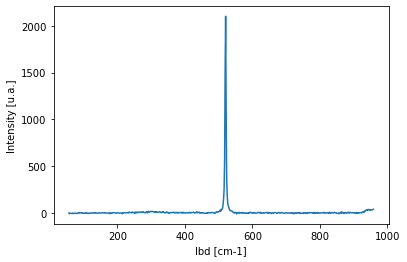

In [1]:
import raman_hyperspectra as rhp
from pathlib import Path
import os
path = Path(rhp.__file__).parent
file = os.path.join(path,r"data\RENISHAW_1D_Si.txt")

da_sliced, da_sliced_interp, da, da_interp = rhp.read_RAMAN_RENISHAW_txt_0D(file)
da_sliced_interp.plot()


In [2]:
print(f"tool: {da_sliced.attrs['tool']}", 
      f"mean spectral resolution: {da_sliced.lbd.attrs['spectral_resolution']:.2f} {da_sliced.lbd.attrs['units']}",sep ="\n"  )

tool: RENIHAW
mean spectral resolution: 1.57 cm-1


## hyperspectra reading
```python
# da (xarray): full spectrum
# da_interp (xarray): full spectrum interpollated on a regular grid
# da_sliced (xarray): sliced spectrum between ldb_dep and lbd_end
# da_sliced_interp (xarray): sliced spectrum between ldb_dep and lbd_end interpollated on a constant grid

da_sliced, da_sliced_interp, da, da_interp = read_RAMAN_WITEC_2D( file, lbd_dep = None, lbd_end = None )
da_sliced, da_sliced_interp, da, da_interp = read_RAMAN_RENISHAW_txt_2D(file, lbd_dep = None, lbd_end = None )
da_sliced, da_sliced_interp, da, da_interp = read_RENISHAW_2D_wdf(file, lbd_dep = None, lbd_end = None )
    
```

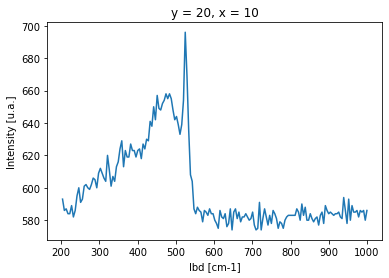

In [3]:
import os
import raman_hyperspectra as rhp
import requests
import tempfile
import zipfile

tmp = tempfile.mkdtemp()  # make a temporary temp directory
os.chdir(tmp)

URL = "https://github.com/Bertin-fap/raman-hyperspectra-examples/raw/master/test_files/Large_Area_Scan_000_Spec_As_cut.zip"
r = requests.get(URL)
with open(r"data.zip", "wb") as f:  # download the zip file from github
    f.write(r.content)
with zipfile.ZipFile("data.zip", "r") as my_zip:
    my_zip.extract("Large_Area_Scan_000_Spec_As_cut.csv")

fname = os.path.join(tmp, "Large_Area_Scan_000_Spec_As_cut.csv")

da_sliced, da_sliced_interp, da_full_spectrum, da_full_spectrum_interp = rhp.read_RAMAN_WITEC_2D(fname,200,1000)
da_sliced.sel(x=10,y=20).plot()

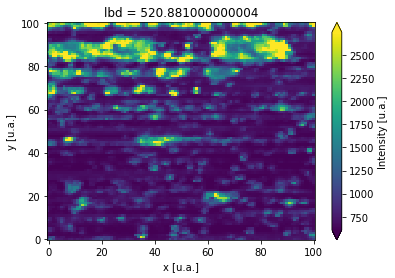

In [4]:
da_full_spectrum_interp.sel(lbd =521, method = "nearest").plot(robust=True)

# cosmic cleaning 
## cosmic cleaning and baseline removing of a spectrum
```python
# baseline correction algoritms
da_flatten = rhp.flatten_spectra(da_interp, ('arPLS',1.e5, 1.e-3, 40))
z, baseline = rhp.flatten_spectra(db,('ials',10_000,  0.01, 0.001))
z, baseline = rhp.flatten_spectra(da,('top hat',440))
z, baseline = rhp.flatten_spectra(db,('rubberband',))
z, baseline = rhp.flatten_spectra(db,('drPLS',1.e6,0.5,0.001,100))
z, baseline = rhp.flatten_spectra(db,('Modpoly',2))
z, baseline = rhp.flatten_spectra(db,('Imodpoly',2))
```

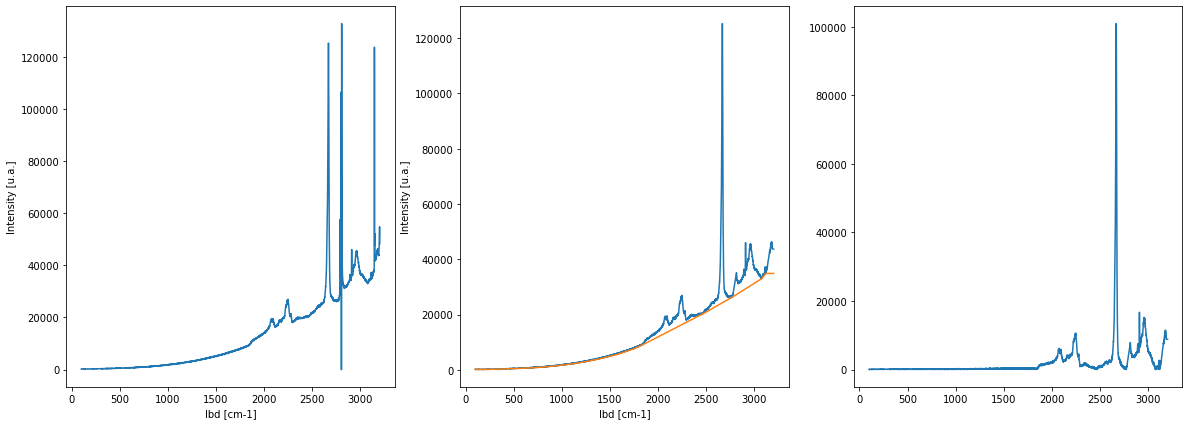

In [5]:
import raman_hyperspectra as rhp
import matplotlib.pyplot as plt
%matplotlib inline

path = Path(rhp.__file__).parent
file = os.path.join(path,r"data\SiC- 785 nm- 100%-1acc.wdf")
da_sliced, da_sliced_interp, da, da_interp = rhp.read_RENISHAW_1D_wdf(file, lbd_dep = None, lbd_end = None )
db = rhp.remove_spikes(da)

z_ials, z_base_ials = rhp.flatten_spectra(db,('rubberband',))

fig = plt.figure(figsize = (20,7))
plt.subplot(1,3,1)
da.plot()
plt.subplot(1,3,2)
db.plot()
plt.plot(db.lbd.values,z_base_ials )
plt.subplot(1,3,3)
plt.plot(db.lbd.values,z_ials )
plt.subplots_adjust(wspace=0.2)

## cosmic cleaning of an hyperspectrum

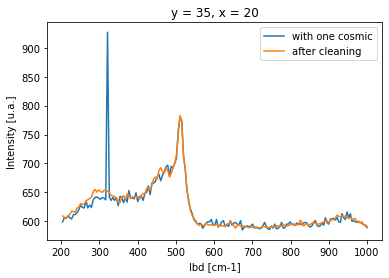

In [6]:
import raman_hyperspectra as rhp
import matplotlib.pyplot as plt
%matplotlib inline

# download
# https://github.com/Bertin-fap/raman-hyperspectra-examples/blob/master/test_files/Large_Area_Scan_000_Spec_As_cut.zip'

import zipfile
import pandas as pd
from pathlib import Path
path_to_download_zip = str(os.path.join(Path.home(), r'Downloads\Large_Area_Scan_000_Spec_As_cut.zip'))
file = r'C:\Temp\Large_Area_Scan_000_Spec_As_cut.csv'
with zipfile.ZipFile(path_to_download_zip) as z:
    with z.open("Large_Area_Scan_000_Spec_As_cut.zip") as f:
        train = pd.read_csv(f, header=0)
train.to_csv(file,index=False)

da_sliced, da_sliced_interp, da_full_spectrum, da_full_spectrum_interp = rhp.read_RAMAN_WITEC_2D(file,200,1000)

x = 20.3  # µm
y = 35.4  # µm
lbd = 320  # cm-1

da_sliced.sel(x=x, y=y, lbd= lbd, method='nearest').values += 300 # add a spike
da_cosmic = rhp.cosmic_cleaning (da_sliced,Kmax = 17)

da_sliced.sel(x=x, y=y, method='nearest').plot(label ='with one cosmic')
da_cosmic.sel(x=x, y=y, method='nearest').plot(label ='after cleaning')
plt.legend()

# Spectra fitting
An experimental Raman spectra can be fitted by the sum:

$${\rm{offset + }}\sum\limits_{i = 0}^N {{h_i}{F_i}\left( {\lambda ;\left\{ p \right\}} \right)} $$ 

of $N$ functions and one offset.The **area** of the functions ${F(E;{{\left\{ p \right\}}_i})}$ are normalized to 1: 

$$\int_{ - \infty }^{ + \infty } {{F_i}\left( {\lambda ;\left\{ p \right\}} \right)d\lambda }  = 1$$

The free parameters of the sum are obtained through least square fitting. The $N$ functions ${F(E;{{\left\{ p \right\}}_i})}$  can be :

1- **Gaussian**:

$$G(\lambda ;{\lambda _0},{\sigma _a},h) = {1 \over {\sqrt {2\pi } \sigma _a^{}}}\exp \left( { - {{{{(\lambda  - {\lambda _0})}^2}} \over {2\sigma _a^2}}} \right)$$

2- **biGaussian** :


$$BG(\lambda ;{\lambda _0},{\sigma _a},{\sigma _b}) = \left\{ {\matrix{
   {{2 \over {\sqrt {2\pi } \left( {{\sigma _a} + {\sigma _b}} \right)}}\exp \left( { - {{{{(\lambda  - {\lambda _0})}^2}} \over {2\sigma _a^2}}} \right):\lambda  \le {\lambda _0}}  \cr 
   {{2 \over {\sqrt {2\pi } \left( {{\sigma _a} + {\sigma _b}} \right)}}\exp \left( { - {{{{(\lambda  - {\lambda _0})}^2}} \over {2\sigma _b^2}}} \right):\lambda  > {\lambda _0}}  \cr} } \right.$$
   
3- **Voigt functions** :

$$\eqalign{
  & {\rm{               V}}(\lambda ;{{\rm{w}}_{\rm{a}}},\gamma ,{\lambda _{\rm{0}}}){\rm{ = }}\int_{{\rm{ - }}\infty }^{{\rm{ + }}\infty } {{\rm{G}}(\lambda '){\rm{L}}(\lambda {\rm{ - }}\lambda '){\rm{d}}\lambda '}   \cr 
  & {\rm{G}}(\lambda ';{{\rm{w}}_{\rm{a}}},{\lambda _{\rm{0}}}){\rm{ = }}\sqrt {{{{\rm{4}}\log ({\rm{2}})} \over \pi }} {{{{\rm{e}}^{{\rm{ - }}{{{\rm{4}}\log ({\rm{2}}){{\lambda '}^{\rm{2}}}} \over {{\rm{w}}_{\rm{a}}^{\rm{2}}}}}}} \over {{{\rm{w}}_{\rm{a}}}}},\;{\rm{L}}({\rm{E}};\gamma ,{\lambda _{\rm{0}}}){\rm{ = }}{\gamma  \over {{\rm{2}}\pi }}{{\rm{1}} \over {{{(\lambda {\rm{ - }}{\lambda _{\rm{0}}})}^{\rm{2}}}{\rm{ + }}{{\left( {{\gamma  \over {\rm{2}}}} \right)}^{\rm{2}}}}} \cr} $$

4- **Lorentzian** :

$$L(\lambda ;\gamma ,{\lambda _0}) = {\gamma  \over {2\pi }}{1 \over {{{(\lambda  - {\lambda _0})}^2} + {{\left( {{\gamma  \over 2}} \right)}^2}}}$$

5- **pseudo-Voigt functions**

$$PV(\lambda ;{w_a},\gamma ,{\lambda _0},h,\eta ) = \eta {\gamma  \over {2\pi }}{1 \over {{{(\lambda  - {\lambda _0})}^2} + {{\left( {{\gamma  \over 2}} \right)}^2}}} + \left( {1 - \eta } \right)\sqrt {{{4\log (2)} \over \pi }} {{{e^{ - {{4\log (2){{(\lambda  - {\lambda _0})}^2}} \over {w_a^2}}}}} \over {{w_a}}}$$

## 1 build a CSV file by copy and paste on of the following templates

In [7]:
import raman_hyperspectra as rhp
print(rhp.raman_hyperspectra_fit.__doc__)


Fits, using  the mean square method, a spectra/hyperstra. The ojective function is a sum of:
    - Gaussian(s)
    - bigaussian(s)
    - Lorentzian(s)
    - Voigt(s)
    - pseudo Voigt(s)
    
The fitting parameters are stored in an Excel/csv file. 

To obtain an initialization file, for a Gaussian model execute the following script:
with open(r'c:\Temp\modele.csv','w') as file:
    file.write("FITTING MODEL INITIALIZATION
")
    file.write("Function type (column A) : Gaussian, Lorentzian, Bigaussian, Voigt, Pseudo_Voigt
")
    file.write("B6 offset, B7,B8... C7,C8...must be blank. mask=1/0 the parameter is free/freezed.               Lbd_0, sigma_a, gamma are expressed in cm^-1
")
    file.write(" ;offset;mask;Lbd_0;mask;h;mask;sigma_a (w_a);mask;sigma_b;mask;gamma;mask;gamma;mask

")
    file.write("Gaussian;0;0;521;1;5000;1;5;1;;;;;;")

This file is parsed by the function init_model:

     param_fixed ,param_fit, func_type, index_fit, label = rhp.init_model(r'c:\Temp\modele.csv')
 

## 2 read/check/plot your model
(i)read the raman_hyperspectra_fit.__doc__ ; (ii) copy and paste one model; (iii) modify the parameters values to meet your application needs.

param_fixed :[0 0 0 0]
param_fit :[0.0e+00 5.2e+02 1.0e+04 5.0e+00]
func_type :['Lorentzian0']
index_fit: [0 1 2 3]
label: ['Lorentzian0  :  Offset = 0.0 ', 'Lorentzian0  :  Lbd_0 = 520.0 ', 'Lorentzian0  :  h = 10000.0 ', 'Lorentzian0  :  gamma = 5.0 '] 


Text(0.5, 0, 'Wavelength [cm-1]')

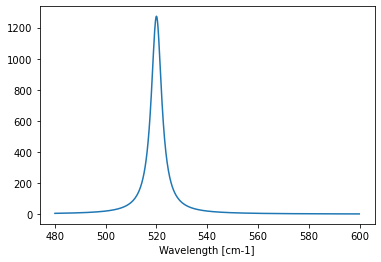

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

with open(r'c:\Temp\modele.csv','w') as file:
    file.write("FITTING MODEL INITIALIZATION\n")
    file.write("Function type (column A) : Gaussian, Lorentzian, Bigaussian, Voigt, Pseudo_Voigt\n")
    file.write("B6 offset, B7,B8... C7,C8...must be blank. mask=1/0 the parameter is free/freezed.               Lbd_0, sigma_a, gamma are expressed in cm^-1\n")
    file.write(" ;offset;mask;Lbd_0;mask;h;mask;sigma_a (w_a);mask;sigma_b;mask;gamma;mask;gamma;mask\n")
    file.write("Lorentzian;0;1;520;1;10000;1;;;;;5;1")
    
param_fixed ,param_fit, func_type, index_fit, label = rhp.init_model(r'c:\Temp\modele.csv')
print(f'param_fixed :{param_fixed}',f'param_fit :{param_fit}',f'func_type :{list(func_type)}' , \
      f'index_fit: {index_fit}',f'label: {label} ', sep='\n')

lbd = np.arange(480,600,0.1)
z = rhp.sum_functions( lbd, param_fit, func_type, index_fit, param_fixed )

plt.plot(lbd,z)
plt.xlabel('Wavelength [cm-1]')



## Fit your spectrum

Text(0.5, 1.0, 'Lorentzian R2 = 0.8514')

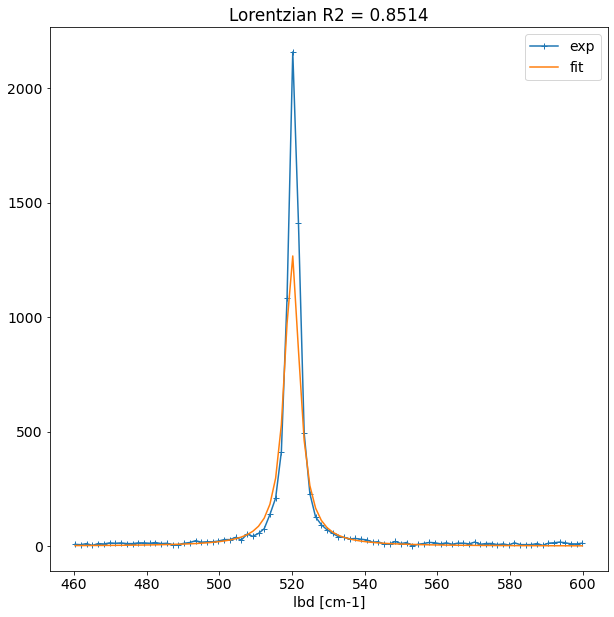

In [9]:
import raman_hyperspectra as rhp
import sys
import matplotlib
from raman_hyperspectra.data import test_raman_hyperspectra as rhp_test

matplotlib.rcParams.update({'font.size': 14})

da_sliced, da_sliced_interp, da, da_interp=rhp_test.renishaw_1d_si()

lbd_deb_fit = 460 # cm-1
lbd_end_fit = 600 # cm-1
top_hat_bandwidth = 440 # cm-1

z,z_base = rhp.flatten_spectra(da,('top hat',top_hat_bandwidth)) # baseline correction

dc = rhp.construct_xarray_0D( z, da.lbd.values )

popt, dc_fit, R2 = rhp.fit_Raman(dc.sel(lbd = slice(lbd_deb_fit,lbd_end_fit)), r'c:\Temp\modele.csv' )

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
dc.sel(lbd = slice(lbd_deb_fit,lbd_end_fit)).plot(marker='+',label ='exp')
dc_fit.plot(label ='fit')
plt.legend(loc = 1)
Model = label[0].split(":")[0].strip()[:-1]
ax.set_title(f'{Model} R2 = {str(round(R2,4))}')

# Maximum statistics
This function could be used for unsupervised classification and processing

denoising with NRWRT: 100%|████████████████████████████████████████████████████| 10201/10201 [00:02<00:00, 3520.50it/s]


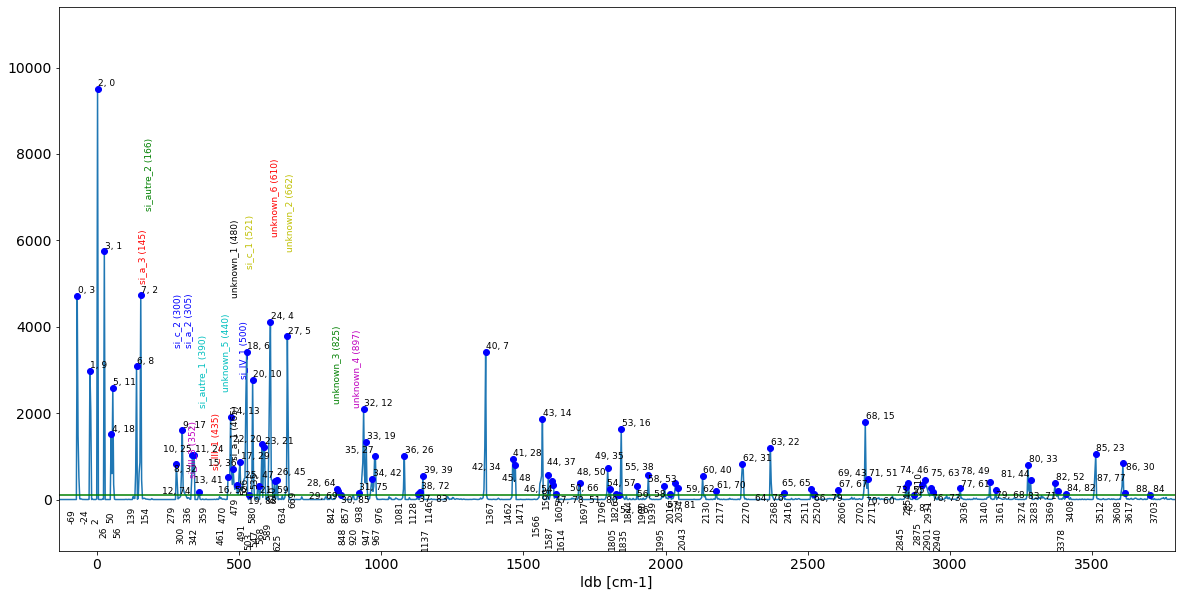

,Indice,lbd_max,peak height,peak width 0.5
3,0,-69.159,4721.0,1.228549
9,1,-24.459,2974.0,1.777945
0,2,2.361,9498.0,1.001055
1,3,26.201,5743.0,1.000610
18,4,50.041,1507.0,0.800929


In [10]:
import raman_hyperspectra as rhp
from raman_hyperspectra.data import test_raman_hyperspectra as rhp_test

# example of phase peak identification (Si)
dic_lbds_ref = { 145: 'si_a_3',
                 300: 'si_c_2',
                 465: 'si_a_1',
                 521: 'si_c_1',
                 166: 'si_autre_2',
                 352: 'si_III_3',
                 390: 'si_autre_1',
                 435: 'si_III_1',
                 500: 'si_IV_1',
                 480: 'unknown_1',
                 662: 'unknown_2',
                 825: 'unknown_3',
                 897: 'unknown_4',
                 440: 'unknown_5',
                 610: 'unknown_6',
                 305: 'si_a_2'}


da_raw, da_raw_interp, da_full_spectrum,da_full_spectrum_interp = rhp_test.witek_2d_si()


da_flatten = rhp.flatten_hyperspectra(da_raw_interp, ("top hat", 440)) # romove th baseline

da_cosmic = rhp.cosmic_cleaning(da_flatten, Kmax = 17) # remove the cosmic

da_noise = rhp.spectra_noise_estimation(da_cosmic,
                                       ("Savitzky-Golay",7, 3), 
                                       ("Gauss",1.7),
                                       lbd_inf_var = 100,
                                       lbd_sup_var = 480) # denoise the spectrum

da_denoise = rhp.denoise_hyperspectra(da_cosmic, 
                                       ('NRWRT',
                                       da_noise.sel(Filter = 'Gauss').values,
                                       4,
                                       "db4",
                                       "soft",
                                       0.9))

df = rhp.Stat_MAX(da_denoise, threshold_peak=100, Ecart = 5, prominence = 0.5,
             height = 3,dic_lbds_ref = dic_lbds_ref, dic_class_Si = None,
             lbd_min_plot = None, lbd_max_plot = None, save = False,
             show = True)
df.head()

# Phase imaging

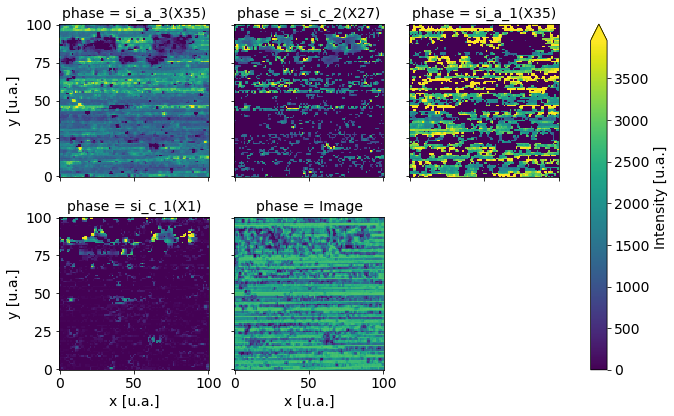

In [11]:
path_image = r'C:\Expert senior\notes\Fit_Raman\1-Cleaning effect\Export_As cut\Image_position_003_As cut_zoom.jpg'
class_Si = {'si_a_3': [130, 160],
            'si_c_2': [285, 315],
            'si_a_1': [450, 480],
            'si_c_1': [516, 526]}
phase = list(class_Si.keys())

db, dic_phase_max = rhp.phase_maximums_imaging( da_denoise , phase , class_Si ,
                                                Ecart = 5, prominence = 0.5, height = 3,
                                                Norme = True, robust = True , save = True,
                                                cmap = 'viridis' ,
                                                path_image = path_image)

# PCA analysis of an hyperspectrum

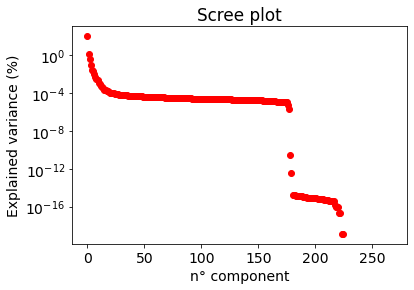

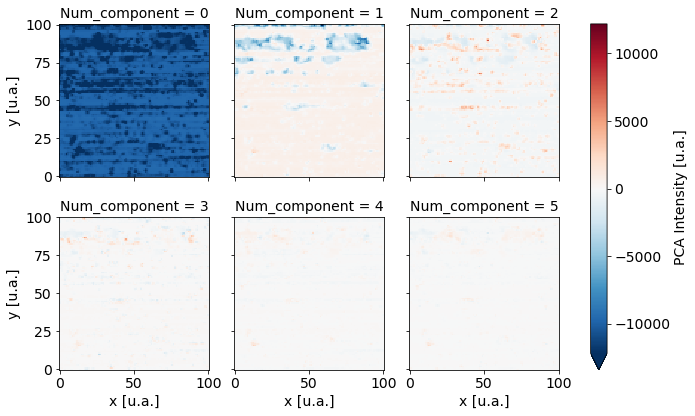

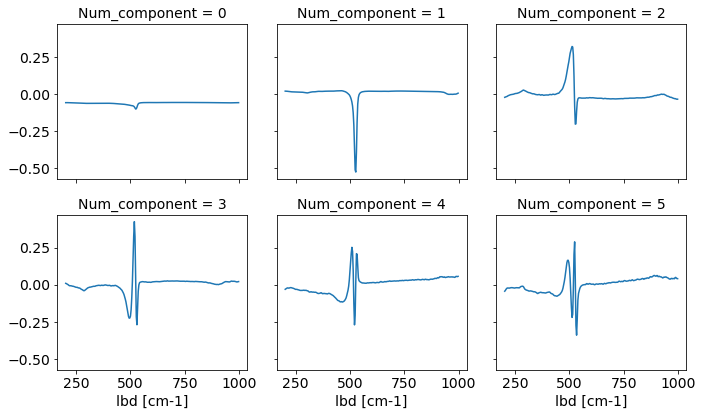

In [16]:
import raman_hyperspectra as rhp
from raman_hyperspectra.data import test_raman_hyperspectra as rhp_test
da_raw, da_raw_interp, da_full_spectrum,da_full_spectrum_interp = rhp_test.witek_2d_si()
da_sliced = da_raw_interp.sel(lbd=slice(200,1000))

Eigen_value, F, L = rhp.Raman_PCA(da_sliced, k_PCA=6)

# NMF analysis of an hyperspectrum

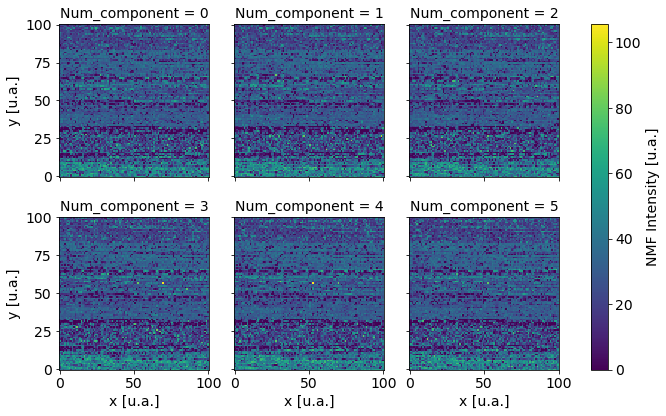

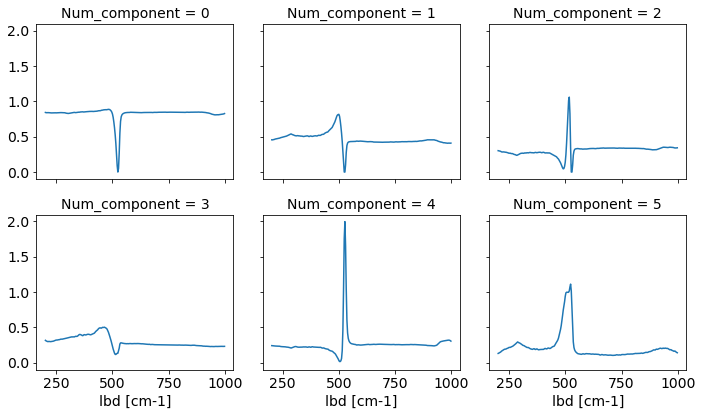

In [17]:
import raman_hyperspectra as rhp
from raman_hyperspectra.data import test_raman_hyperspectra as rhp_test
da_raw, da_raw_interp, da_full_spectrum,da_full_spectrum_interp = rhp_test.witek_2d_si()
da_sliced = da_raw_interp.sel(lbd=slice(200,1000))
W,H = rhp.Raman_NMF(da_sliced,k_NMF = 6)

# robust PCA

In [18]:
import raman_hyperspectra as rhp
from raman_hyperspectra.data import test_raman_hyperspectra as rhp_test
da_raw, da_raw_interp, da_full_spectrum,da_full_spectrum_interp = rhp_test.witek_2d_si()
da_sliced = da_raw_interp.sel(lbd=slice(200,1000))
X,Y = rhp.Raman_Robust_PCA(da_sliced)

Itn   Fnc       NrmNuc    Nrmℓ1     Cnstr     r         s         ρ       
--------------------------------------------------------------------------
   0  1.51e+06  1.51e+06  1.32e+05  5.39e+01  4.88e-05  1.20e+00  1.20e-01
   1  1.51e+06  1.51e+06  1.26e+05  4.66e+01  4.22e-05  9.70e-01  1.20e-01
   2  1.50e+06  1.45e+06  5.10e+06  4.52e+03  4.10e-03  6.24e-01  7.91e-04
   3  1.48e+06  1.31e+06  1.72e+07  2.04e+04  1.85e-02  2.22e-01  6.41e-05
   4  1.49e+06  1.21e+06  2.80e+07  3.72e+04  3.37e-02  1.08e-01  1.85e-05
   5  1.49e+06  1.17e+06  3.29e+07  3.89e+04  3.52e-02  5.63e-02  1.03e-05
   6  1.49e+06  1.16e+06  3.38e+07  3.11e+04  2.82e-02  3.24e-02  8.16e-06
   7  1.49e+06  1.18e+06  3.13e+07  2.42e+04  2.19e-02  2.59e-02  8.16e-06
   8  1.48e+06  1.19e+06  2.84e+07  1.90e+04  1.73e-02  2.13e-02  8.16e-06
   9  1.47e+06  1.21e+06  2.61e+07  1.56e+04  1.42e-02  1.47e-02  7.35e-06
  10  1.46e+06  1.21e+06  2.49e+07  1.26e+04  1.14e-02  1.02e-02  7.35e-06
  11  1.45e+06  1.21e+06 

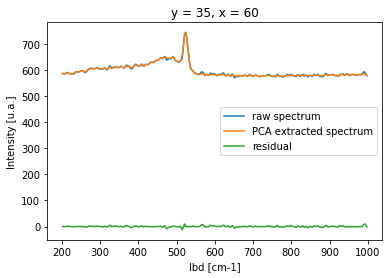

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

x = 60.3  # µm
y = 35.4  # µm

da_sliced.sel(x=x, y=y, method='nearest').plot(label = 'raw spectrum')
X.sel(x=x, y=y, method='nearest').plot(label = 'PCA extracted spectrum')
Y.sel(x=x, y=y, method='nearest').plot(label = 'residual')
plt.legend()

## Hyperspectra visualization with xrviz
You have to download the xrviz package
```python
pip install xrviz
    
```

In [ ]:
from xrviz.dashboard import Dashboard
import raman_hyperspectra as rhp


file = r"C:\my_modules_Python\raman_hyperspectra\rhp_demo_files\Large Area Scan_000_Spec_As cut.txt"
da_sliced, da_sliced_interp, da_full_spectrum, da_full_spectrum_interp = rhp.read_RAMAN_WITEC_2D(file,200,1000)
dx = rhp.update_xarray([da_sliced_interp],"bidon",50,50,0) # expressed the xarray with physcal units
dash = Dashboard(dx[0] )
dash.panel